<a href="https://colab.research.google.com/github/olearypatrick/LessonMaterials/blob/master/5_KerasNueralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Nueral Network Practice
Today, we will built a nueral network in just 10 lines of code. We are going to use very simple data that we don't have to pre-process since it is already in a numerical format. We will go over how to build our model, how to initalize the model, how to train the model, and lastly how to validate its performance. 

In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

We can now load our dataset.

In this tutorial, we are going to use the Pima Indians onset of diabetes dataset. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

[Dataset Link](https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.csv)

We can now load the file as a matrix of numbers using the NumPy function loadtxt().

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X).

The variables can be summarized as follows:

Input Variables (X):

Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
Output Variables (y):

Class variable (0 or 1)
Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g. [rows, columns].

We can split the array into two arrays by selecting subsets of columns using the standard NumPy slice operator or “:” We can select the first 8 columns from index 0 to index 7 via the slice 0:8. We can then select the output column (the 9th variable) via index 8.

In [3]:
# load the dataset
dataset = loadtxt('https://raw.githubusercontent.com/Intro-Course-AI-ML/LessonMaterials/master/project_data/pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

Now we will create our basic model. We will use the Keras Sequential Model, just like last time, and we will have 3 layers, also just like last time. The input dimensions are 8, since we have 8 factors that can determine whether they will get diabetes. 

In [4]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# fit the keras model on the dataset, train the model
training = model.fit(X, y, epochs=300, batch_size=10, verbose = 2)

Epoch 1/300
77/77 - 1s - loss: 1.8987 - accuracy: 0.5599
Epoch 2/300
77/77 - 0s - loss: 0.7530 - accuracy: 0.4609
Epoch 3/300
77/77 - 0s - loss: 0.6773 - accuracy: 0.5794
Epoch 4/300
77/77 - 0s - loss: 0.6568 - accuracy: 0.6497
Epoch 5/300
77/77 - 0s - loss: 0.6494 - accuracy: 0.6497
Epoch 6/300
77/77 - 0s - loss: 0.6471 - accuracy: 0.6523
Epoch 7/300
77/77 - 0s - loss: 0.6379 - accuracy: 0.6510
Epoch 8/300
77/77 - 0s - loss: 0.6346 - accuracy: 0.6497
Epoch 9/300
77/77 - 0s - loss: 0.6298 - accuracy: 0.6510
Epoch 10/300
77/77 - 0s - loss: 0.6306 - accuracy: 0.6484
Epoch 11/300
77/77 - 0s - loss: 0.6260 - accuracy: 0.6510
Epoch 12/300
77/77 - 0s - loss: 0.6216 - accuracy: 0.6510
Epoch 13/300
77/77 - 0s - loss: 0.6245 - accuracy: 0.6510
Epoch 14/300
77/77 - 0s - loss: 0.6194 - accuracy: 0.6497
Epoch 15/300
77/77 - 0s - loss: 0.6199 - accuracy: 0.6523
Epoch 16/300
77/77 - 0s - loss: 0.6173 - accuracy: 0.6510
Epoch 17/300
77/77 - 0s - loss: 0.6154 - accuracy: 0.6523
Epoch 18/300
77/77 - 0s

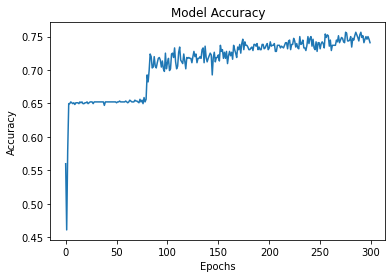

In [7]:
# now lets see how the accuracy of our model increased over training.
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

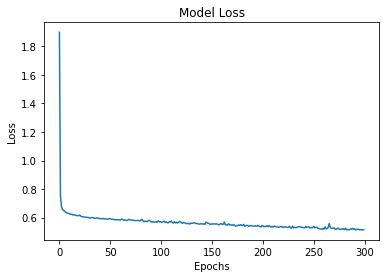

In [8]:
# now lets see how the loss of our model progressed over training.
plt.plot(training.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [9]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print(model.evaluate(X,y))
print(accuracy * 100)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 936us/step - loss: 0.5159 - accuracy: 0.7487
[0.5158769488334656, 0.7486979365348816]
74.86979365348816
Accuracy: 74.87


What score did you get?
Post your results in the zoom chat.

Neural networks are a stochastic algorithm, meaning that the same algorithm on the same data can train a different model with different skill each time the code is run. This is a feature, not a bug.

This model won't perform very well since the architecture is not very good. However, it is a very simple architecture, meaning it is a good place to start and learn from. 